# Stock Prediction using LSTM

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM , BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

In [29]:
def makeseq(data,seq):
    data_seq = []
    for i in range(seq,len(data)):
        if len(data.shape) > 1:
            data_seq.append(data[i-seq:i,:])
        else:
            data_seq.append(data[i-seq:i])
    return np.array(data_seq)[:-1,:]
        

In [20]:
np.random.seed(7)

filename = 'GoogleStocks.csv'

data = pd.read_csv(filename)

data['avg'] = data.apply(lambda row: ((row.high) + float(row.low))/2, axis=1)
data['target']=data['open'].shift(-1)
data=data.drop(columns=['close','open','high','low','date'])
print(data.head())
scaler = StandardScaler()
data = scaler.fit_transform(data)
x_train = data[0:int(0.8*len(data)),:-1]
y_train = data[0:int(0.8*len(data)),-1]
x_val = data[int(0.8*len(data)):,:-1]
y_val = data[int(0.8*len(data)):,-1]



    volume         avg   target
0  1894639  1189.77500  1196.93
1  1493841  1196.71875  1226.32
2  1668910  1216.41250  1216.00
3  1195899  1222.47000  1197.35
4  2089367  1211.65500  1188.81


/home/mythri/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mythri/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


130/130 [==============================] - 14s 105ms/sample - loss: 0.0147
Model parameters:
Num Layers: 2
Time Steps: 20
Num cells in hidden Layer: 30
val loss: 0.014666608907282353


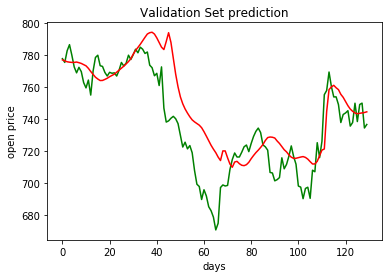

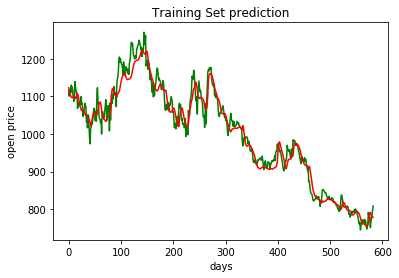

130/130 [==============================] - 14s 107ms/sample - loss: 0.0097
Model parameters:
Num Layers: 2
Time Steps: 20
Num cells in hidden Layer: 50
val loss: 0.00974800023653258


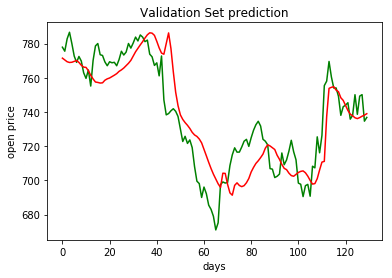

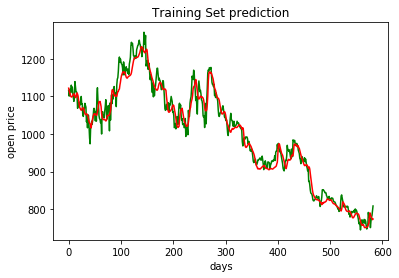

130/130 [==============================] - 15s 112ms/sample - loss: 0.0161
Model parameters:
Num Layers: 2
Time Steps: 20
Num cells in hidden Layer: 80
val loss: 0.01614622730188645


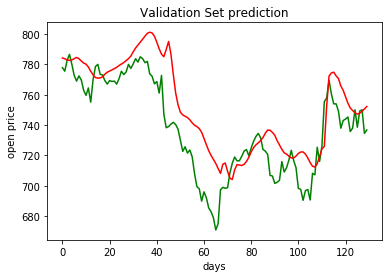

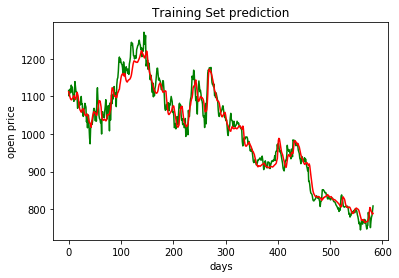

130/130 [==============================] - 14s 110ms/sample - loss: 0.0213
Model parameters:
Num Layers: 3
Time Steps: 20
Num cells in hidden Layer: 30
val loss: 0.021287122012402574


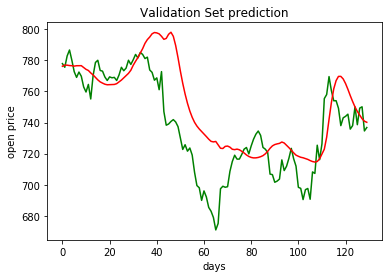

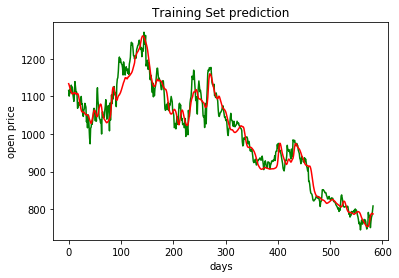

130/130 [==============================] - 15s 112ms/sample - loss: 0.0138
Model parameters:
Num Layers: 3
Time Steps: 20
Num cells in hidden Layer: 50
val loss: 0.013783809410793206


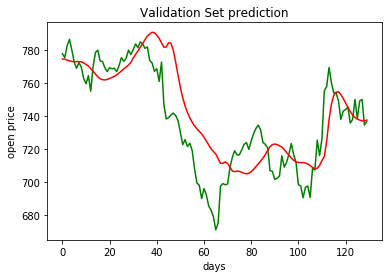

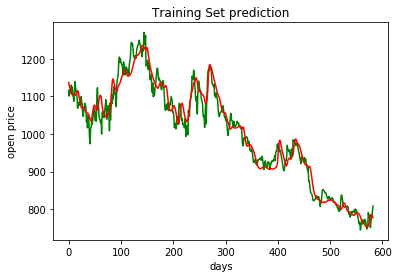

130/130 [==============================] - 15s 114ms/sample - loss: 0.0374
Model parameters:
Num Layers: 3
Time Steps: 20
Num cells in hidden Layer: 80
val loss: 0.037445685611321375


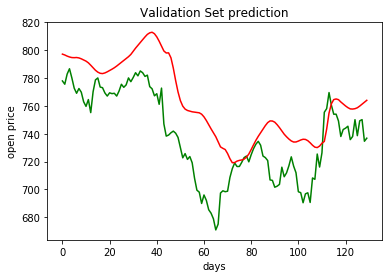

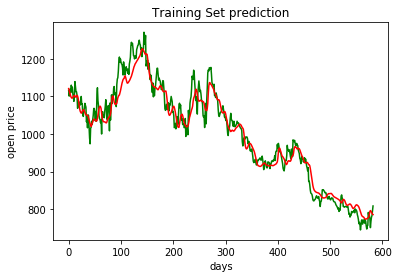

100/100 [==============================] - 15s 151ms/sample - loss: 0.0180
Model parameters:
Num Layers: 2
Time Steps: 50
Num cells in hidden Layer: 30
val loss: 0.018049187157303095


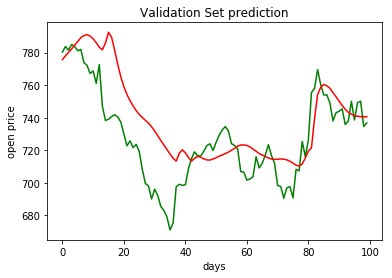

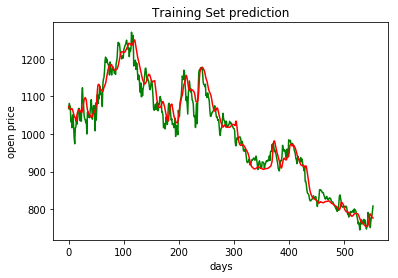

100/100 [==============================] - 15s 152ms/sample - loss: 0.0172
Model parameters:
Num Layers: 2
Time Steps: 50
Num cells in hidden Layer: 50
val loss: 0.017184609919786452


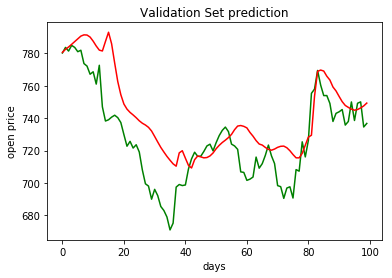

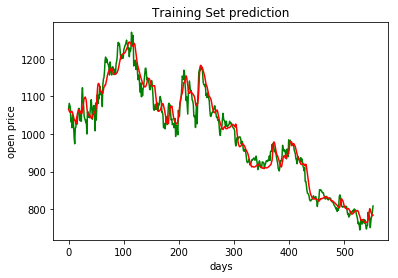

100/100 [==============================] - 15s 155ms/sample - loss: 0.0100
Model parameters:
Num Layers: 2
Time Steps: 50
Num cells in hidden Layer: 80
val loss: 0.009961140975356102


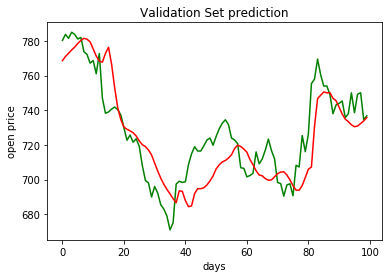

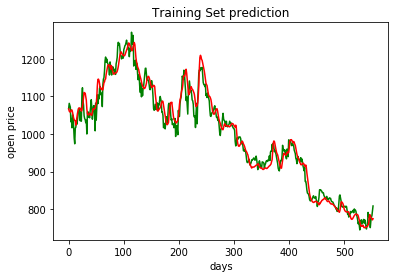

100/100 [==============================] - 16s 157ms/sample - loss: 0.0305
Model parameters:
Num Layers: 3
Time Steps: 50
Num cells in hidden Layer: 30
val loss: 0.03050200706347823


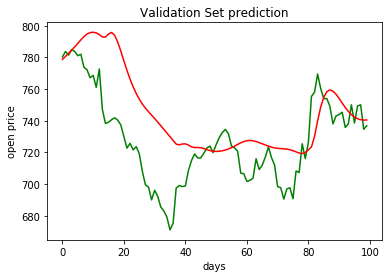

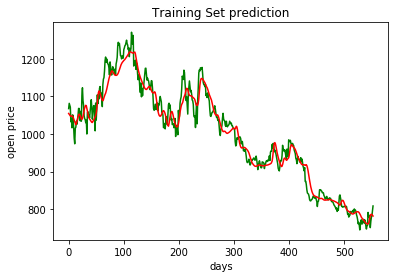

100/100 [==============================] - 16s 160ms/sample - loss: 0.0165
Model parameters:
Num Layers: 3
Time Steps: 50
Num cells in hidden Layer: 50
val loss: 0.016526412442326544


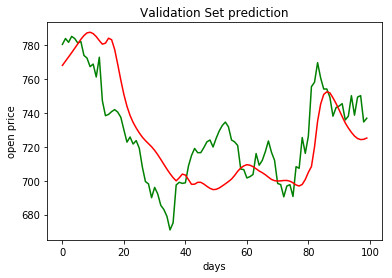

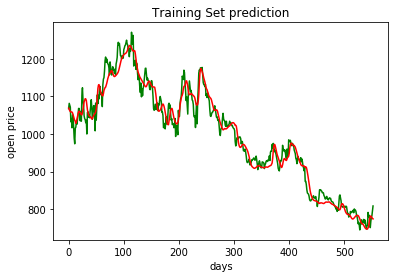

100/100 [==============================] - 16s 162ms/sample - loss: 0.0454
Model parameters:
Num Layers: 3
Time Steps: 50
Num cells in hidden Layer: 80
val loss: 0.045385722815990445


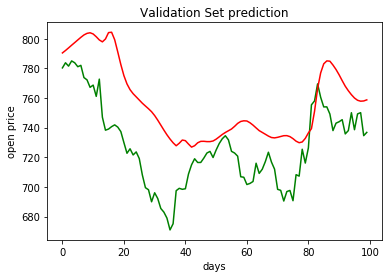

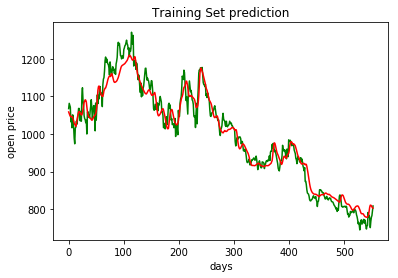

75/75 [==============================] - 16s 218ms/sample - loss: 0.0278
Model parameters:
Num Layers: 2
Time Steps: 75
Num cells in hidden Layer: 30
val loss: 0.027835603635758162


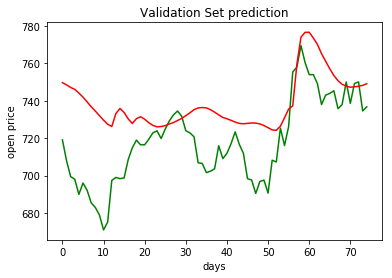

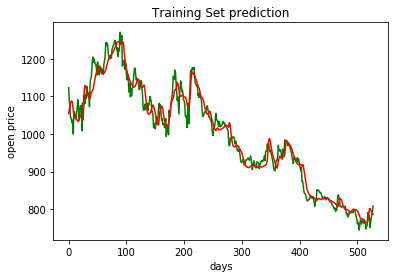

75/75 [==============================] - 17s 221ms/sample - loss: 0.0191
Model parameters:
Num Layers: 2
Time Steps: 75
Num cells in hidden Layer: 50
val loss: 0.019060524969051282


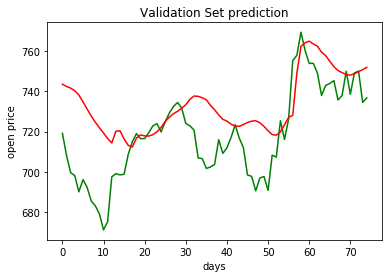

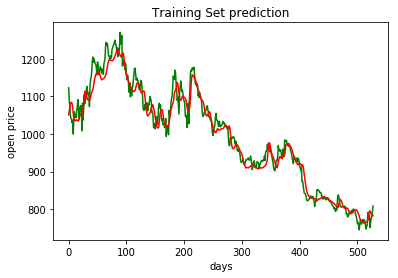

75/75 [==============================] - 17s 233ms/sample - loss: 0.0159
Model parameters:
Num Layers: 2
Time Steps: 75
Num cells in hidden Layer: 80
val loss: 0.015895285612593093


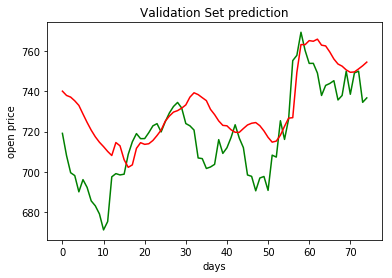

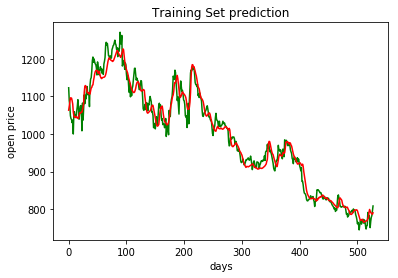

75/75 [==============================] - 17s 232ms/sample - loss: 0.0185
Model parameters:
Num Layers: 3
Time Steps: 75
Num cells in hidden Layer: 30
val loss: 0.018546628976861636


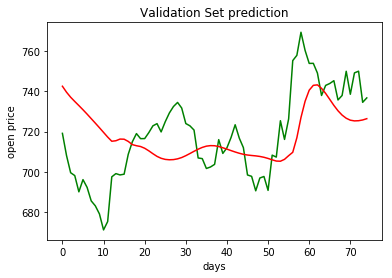

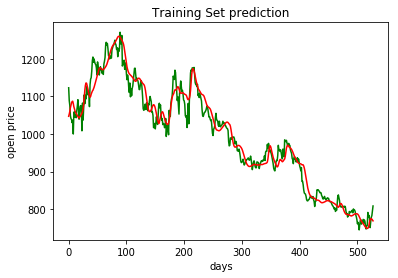

75/75 [==============================] - 18s 236ms/sample - loss: 0.0172
Model parameters:
Num Layers: 3
Time Steps: 75
Num cells in hidden Layer: 50
val loss: 0.017182561134298644


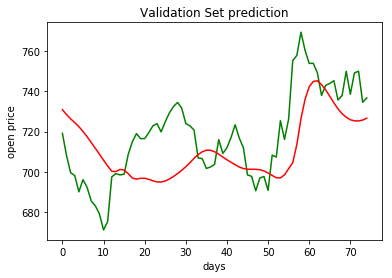

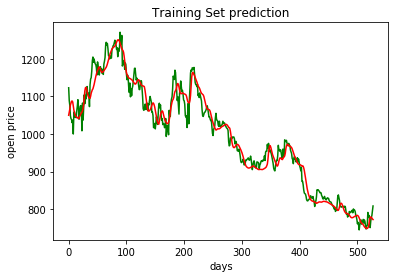

75/75 [==============================] - 18s 236ms/sample - loss: 0.0151
Model parameters:
Num Layers: 3
Time Steps: 75
Num cells in hidden Layer: 80
val loss: 0.015112998078887661


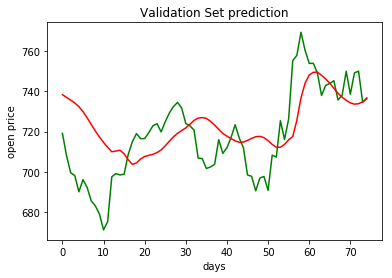

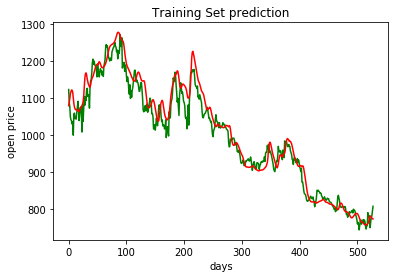

In [44]:
seqs = [20,50,75]
cells = [30,50,80]

for seq in seqs:
    x_tr=makeseq(x_train,seq)
    y_tr=y_train[seq:-1]#makeseq(y_train,seq)
    x_v=makeseq(x_val,seq)
    y_v=y_val[seq:-1]#makeseq(y_val,seq)
    for hlayer in range(2,4):
        for cellsize in cells:
            model = Sequential()
            model.add(LSTM(cellsize,input_shape=(x_tr.shape[1:]),return_sequences=True))
            model.add(Dropout(0.2))

            if hlayer == 2:
                model.add(LSTM(cellsize,return_sequences=False))
                model.add(Dropout(0.2))
            else:
                model.add(LSTM(cellsize,return_sequences=True))
                model.add(Dropout(0.2))
                model.add(LSTM(cellsize,return_sequences=False))
                model.add(Dropout(0.2))
            model.add(Dense(1,activation='linear'))
            filep='weights_c'+str(cellsize)+'_l'+str(hlayer)+'_s'+str(seq)+'.hdf5'
            if not os.path.isfile(filep):
                checkpoint = ModelCheckpoint(filepath=filep,verbose=2)
                model.compile(loss='mean_squared_error',optimizer='adagrad')
                model.summary()
                model.fit(x_tr,y_tr,batch_size=2,epochs=10,verbose=2,callbacks=[checkpoint])
            else:
                model.load_weights(filep)
                model.compile(loss='mean_squared_error',optimizer='adagrad')
            score = model.evaluate(x_v,y_v)
            
            ypred = model.predict(x_v)
            ytrainpred = model.predict(x_tr)
            print("Model parameters:")
            print("Num Layers:",hlayer)
            print("Time Steps:",seq)
            print("Num cells in hidden Layer:",cellsize)
            print("val loss:",score)
            
            xtemp = np.zeros((y_v.shape[0],2))
            y_v1 = scaler.inverse_transform(np.concatenate((xtemp,np.reshape(y_v,(y_v.shape[0],1))),axis=1))[:,-1]
            ypred1 = scaler.inverse_transform(np.concatenate((xtemp,ypred),axis=1))[:,-1]
            plt.plot(range(x_v.shape[0]),y_v1,color='green',label='actual')
            plt.plot(range(x_v.shape[0]),ypred1,color='red',label='predicted')
            plt.xlabel('days')
            plt.ylabel('open price')
            plt.title('Validation Set prediction')
            plt.show()
            xtemp = np.zeros((y_tr.shape[0],2))
            y_tr1 = scaler.inverse_transform(np.concatenate((xtemp,np.reshape(y_tr,(y_tr.shape[0],1))),axis=1))[:,-1]
            ytrainpred1= scaler.inverse_transform(np.concatenate((xtemp,ytrainpred),axis=1))[:,-1]
            plt.plot(range(x_tr.shape[0]),y_tr1,color='green',label='actual')
            plt.plot(range(x_tr.shape[0]),ytrainpred1,color='red',label='predicted')
            plt.xlabel('days')
            plt.ylabel('open price')
            plt.title('Training Set prediction')
            plt.show()
            
            
    